In [ ]:
# load an image as an rgb array
def load_image(filename):
    # load image from file
    image = Image.open(filename)
    # convert to RGB, if needed
    image = image.convert('RGB')
    # convert to array
    pixels = asarray(image)
    return pixels

In [ ]:
# load images and extract faces for all images in a directory
def load_faces(directory, n_faces):
    faces = list()
    # enumerate files
    for filename in listdir(directory):
        # load the image 
        pixels = load_image(directory + filename)
        # store
        faces.append(pixels)
        # stop once we have enough
        if len(faces) >= n_faces:
            break
    return faces

In [ ]:
# plot a list of loaded faces
def plot_faces(faces, n):
    for i in range(n*n):
        # define subplot
        pyplot.subplot(n,n,i+1)
        pyplot.axis('off')
        pyplot.imshow(faces[i])
    pyplot.show()

Loaded:  (25, 218, 178, 3)


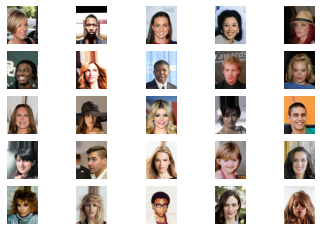

In [14]:
# load and plot faces
from os import listdir
from numpy import asarray
from PIL import Image
from matplotlib import pyplot

# load an image as an rgb numpy array
def load_image(filename):
    # load image from file
    image = Image.open(filename)
    # convert to RGB, if needed
    image = image.convert('RGB')
    # convert to array
    pixels = asarray(image)
    return pixels

# load images and extract faces for all images in a directory
def load_faces(directory, n_faces):
    faces = list()
    # enumerate files
    for filename in listdir(directory):
        # load the image
        pixels = load_image(directory + filename)
        # store
        faces.append(pixels)
        # stop once we have enough
        if len(faces) >= n_faces:
            break
    return asarray(faces)

# plot a list of loaded faces
def plot_faces(faces, n):
    for i in range(n*n):
        # define subplot
        pyplot.subplot(n,n,1+i)
        # turn off axis
        pyplot.axis('off')
        # plot raw pixel data
        pyplot.imshow(faces[i])
    pyplot.show()

# directory that contains all images
directory = '/Users/xin/Desktop/img_align_celeba/'
# load and extract all faces
faces = load_faces(directory, 25)
print('Loaded: ', faces.shape)
# plot faces
plot_faces(faces, 5)

In [15]:
# confirm mtcnn was installed correctly
import mtcnn
# show version
print(mtcnn.__version__)

0.1.0


In [ ]:
# prepare model
model = MTCNN()
# detect face in the image
faces = model.detect_faces(pixels)
# extract details of the face
x1, y1, width, height = faces[0]['box']

In [17]:
# extract the face from a loaded image and resize
def extract_face(model, pixels, required_size=(80,80)):
    # detect face in the image
    faces = model.detect_faces(pixels)
    # skip case where we could not detect a face
    if len(faces)==0:
        return None
    # extract details of the face
    x1, y1, width, height = faces[0]['box']
    # force detected pixel values to be positive (bug fix)
    x1, y1 = abs(x1), abs(y1)
    # convert into cordinates
    x2, y2 = x1+width, y1+height
    # retrieve face pixels
    face_pixels = pixels[y1:y2,x1:x2]
    # resize pixels to the model size
    image = Image.fromarray(face_pixels)
    image = image.resize(required_size)
    face_array = asarray(image)
    return face_array

In [19]:
# load images and extract faces for all images in a directory
def load_faces(directory, n_faces):
    # prepare model
    model = MTCNN()
    faces = list()
    # enumerate files
    for filename in listdir(directory):
        # load the image
        pixels = load_image(directory+filename)
        # get face
        face = extract_face(pixels)
        if face is None:
            continue
        # store
        faces.append(face)
        print(len(faces), face.shape)
        # stop once we have enough 
        if len(faces)>=n_faces:
            break
    return asarray(faces)

---

In [20]:
# example of extracting and resizing faces into a new dataset
from os import listdir
from numpy import asarray, savez_compressed
from PIL import Image
from mtcnn.mtcnn import MTCNN

In [21]:
# load an image as an rgb numpy array
def load_image(filename):
    # load image from file
    image = Image.open(filename)
    # convert to RGB, if needed
    image = image.convert('RGB')
    # convert to array
    pixels = asarray(image)
    return pixels

In [22]:
# extract the face from a loaded image and resize
def extract_face(model, pixels, required_size=(80,80)):
    # detect face in the image
    faces = model.detect_faces(pixels)
    # skip cases where we could not detect a face
    if len(faces)==0:
        return None
    # extract details of the face
    x1, y1, width, height = faces[0]['box']
    # force detected pixel values to be positive (bug fix)
    x1, y1 = abs(x1), abs(y1)
    # convert into cordinates
    x2, y2 = x1+width, y1+height
    # retrieve face pixels
    face_pixels = pixels[y1:y2, x1:x2]
    # resize pixels to the model size
    image = Image.fromarray(face_pixels)
    image = image.resize(required_size)
    face_array = asarray(image)
    return face_array

In [23]:
# load images and extract faces for all images in a directory
def load_faces(directory, n_faces):
    # prepare model
    model = MTCNN()
    faces = list()
    # enumerate files
    for filename in listdir(directory):
        # load the image
        pixels = load_image(directory+filename)
        # get face
        face = extract_face(model, pixels)
        if face is None:
            continue
        # store
        faces.append(face)
        print(len(faces), face.shape)
        # stop once we have enough
        if len(faces)>=n_faces:
            break
    return asarray(faces)

In [24]:
# directory that contains all images
directory = '/Users/xin/Desktop/img_align_celeba/'
# load and extract all faces
all_faces = load_faces(directory, 50000)
print('Loaded: ', all_faces.shape)
# save in compressed format
savez_compressed('img_align_celeba.npz', all_faces)

1 (80, 80, 3)
2 (80, 80, 3)
3 (80, 80, 3)
4 (80, 80, 3)
5 (80, 80, 3)
6 (80, 80, 3)
7 (80, 80, 3)
8 (80, 80, 3)
9 (80, 80, 3)
10 (80, 80, 3)
11 (80, 80, 3)
12 (80, 80, 3)
13 (80, 80, 3)
14 (80, 80, 3)
15 (80, 80, 3)
16 (80, 80, 3)
17 (80, 80, 3)
18 (80, 80, 3)
19 (80, 80, 3)
20 (80, 80, 3)
21 (80, 80, 3)
22 (80, 80, 3)
23 (80, 80, 3)
24 (80, 80, 3)
25 (80, 80, 3)
26 (80, 80, 3)
27 (80, 80, 3)
28 (80, 80, 3)
29 (80, 80, 3)
30 (80, 80, 3)
31 (80, 80, 3)
32 (80, 80, 3)
33 (80, 80, 3)
34 (80, 80, 3)
35 (80, 80, 3)
36 (80, 80, 3)
37 (80, 80, 3)
38 (80, 80, 3)
39 (80, 80, 3)
40 (80, 80, 3)
41 (80, 80, 3)
42 (80, 80, 3)
43 (80, 80, 3)
44 (80, 80, 3)
45 (80, 80, 3)
46 (80, 80, 3)
47 (80, 80, 3)
48 (80, 80, 3)
49 (80, 80, 3)
50 (80, 80, 3)
51 (80, 80, 3)
52 (80, 80, 3)
53 (80, 80, 3)
54 (80, 80, 3)
55 (80, 80, 3)
56 (80, 80, 3)
57 (80, 80, 3)
58 (80, 80, 3)
59 (80, 80, 3)
60 (80, 80, 3)
61 (80, 80, 3)
62 (80, 80, 3)
63 (80, 80, 3)
64 (80, 80, 3)
65 (80, 80, 3)
66 (80, 80, 3)
67 (80, 80, 3)
68 (

In [26]:
# load the prepared dataset
from numpy import load
# load the face dataset
data = load('/Users/xin/Desktop/img_align_celeba_50k.npz')
faces = data['arr_0']
print('Loaded: ', faces.shape)

Loaded:  (50000, 80, 80, 3)
